In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('C:/Users/abhis/Downloads/google.csv')

In [5]:
dataset.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [8]:
dataset.shape

(4317, 7)

In [9]:
dataset.drop('Adj Close',axis = 1, inplace= True)

In [10]:
dataset.head()

,Date,High,Low,Open,Close,Volume
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0


In [12]:
dataset.isnull().sum()

Date      0
High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

In [13]:
dataset.isna().any()

Date      False
High      False
Low       False
Open      False
Close     False
Volume    False
dtype: bool

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4317 non-null   datetime64[ns]
 1   High    4317 non-null   float64       
 2   Low     4317 non-null   float64       
 3   Open    4317 non-null   float64       
 4   Close   4317 non-null   float64       
 5   Volume  4317 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 202.5 KB


In [15]:
dataset.describe()

,High,Low,Open,Close,Volume
count,4317.000000,4317.000000,4317.000000,4317.000000,4.317000e+03
mean,639.682936,627.615621,633.603748,633.852357,6.523837e+06
std,561.783142,552.069438,556.527532,557.255541,7.830526e+06
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03
25%,247.507278,241.469910,244.832306,244.334183,1.593563e+06
50%,401.988251,395.168823,399.004425,398.561096,3.851583e+06
75%,933.440002,923.030029,929.059998,928.799988,8.268878e+06
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07


In [16]:
print(len(dataset))

4317


<AxesSubplot:>

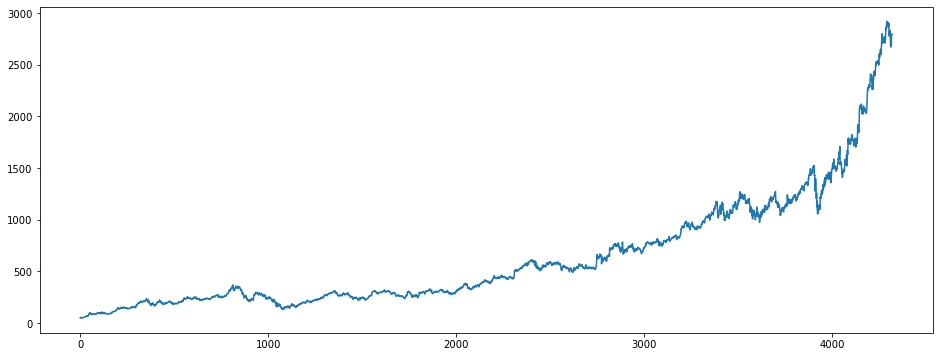

In [17]:
dataset['Open'].plot(figsize=(16,6))

In [18]:
X = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 0)

In [20]:
X_train.shape

(3237, 4)

In [21]:
X_test.shape

(1080, 4)

# Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [25]:
predicted = regressor.predict(X_test)

In [26]:
print(X_test)

             Open         High          Low      Volume
3209   921.000000   933.169983   918.750000   1596900.0
1021   210.794891   215.382690   206.725143  14513397.0
1813   296.149963   300.025421   296.015472   5034801.0
530    201.992874   203.078812   200.134842  10618452.0
3817  1250.930054  1263.324951  1249.939941    952400.0
...           ...          ...          ...         ...
388    189.743790   190.984146   182.884506  17946416.0
4012  1525.180054  1526.479980  1497.660034   1702200.0
1699   263.781281   264.174805   261.868439   3921042.0
2165   401.833832   401.993225   399.168823   4342616.0
2441   525.666809   531.470825   522.445618   1905517.0

[1080 rows x 4 columns]


In [27]:
predicted.shape

(1080,)

In [30]:
dframe = pd.DataFrame(y_test,predicted)

In [31]:
dfr = pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [32]:
print(dfr)

      Actual Price  Predicted Price
3209    930.239990       928.968535
1021    208.548309       211.353085
1813    298.949463       299.190097
530     202.675323       201.499554
3817   1253.069946      1260.062766
...            ...              ...
388     183.362717       185.508610
4012   1500.339966      1505.089817
1699    263.915771       262.702687
2165    399.831329       399.995544
2441    529.895203       527.852191

[1080 rows x 2 columns]


In [33]:
dfr.head(10)

,Actual Price,Predicted Price
3209,930.239990,928.968535
1021,208.548309,211.353085
1813,298.949463,299.190097
530,202.675323,201.499554
3817,1253.069946,1260.062766
3791,1220.170044,1217.725435
2065,338.879791,337.330113
3274,906.659973,907.382139
1376,264.653015,263.018614
4277,2778.320068,2747.468700


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
regressor.score(X_test,y_test)

0.9999308300574887

In [37]:
graph = dfr.head(10)

<AxesSubplot:>

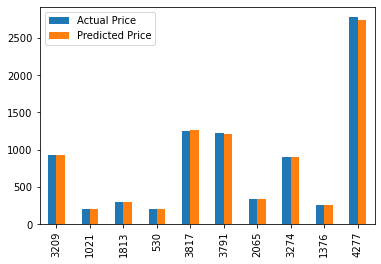

In [38]:
graph.plot(kind='bar')

# LSTM Based Model

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [6]:
data = pd.read_csv('C:/Users/abhis/OneDrive/Documents/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [8]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [10]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [11]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [12]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [13]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [14]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 21s - loss: 0.0392 - 21s/epoch - 590ms/step
Epoch 2/20
35/35 - 9s - loss: 0.0117 - 9s/epoch - 252ms/step
Epoch 3/20
35/35 - 9s - loss: 0.0116 - 9s/epoch - 248ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0121 - 8s/epoch - 238ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0089 - 8s/epoch - 232ms/step
Epoch 6/20
35/35 - 8s - loss: 0.0086 - 8s/epoch - 237ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0068 - 8s/epoch - 237ms/step
Epoch 8/20
35/35 - 8s - loss: 0.0065 - 8s/epoch - 237ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0074 - 8s/epoch - 237ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0062 - 8s/epoch - 238ms/step
Epoch 11/20
35/35 - 8s - loss: 0.0060 - 8s/epoch - 237ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0066 - 8s/epoch - 237ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0059 - 8s/epoch - 233ms/step
Epoch 14/20
35/35 - 8s - loss: 0.0066 - 8s/epoch - 236ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0053 - 8s/epoch - 237ms/step
Epoch 16/20
35/35 - 8s - loss: 0.0056 - 8s/epoch - 236ms/step
Epoch 17/20
35/

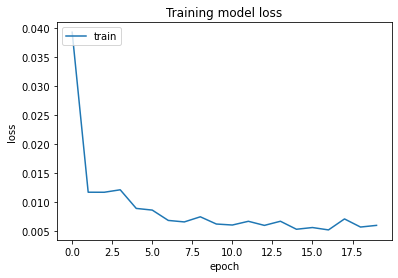

In [15]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
testData = pd.read_csv('C:/Users/abhis/OneDrive/Documents/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [20]:
y_pred = model.predict(X_test)

In [21]:
predicted_price = sc.inverse_transform(y_pred)

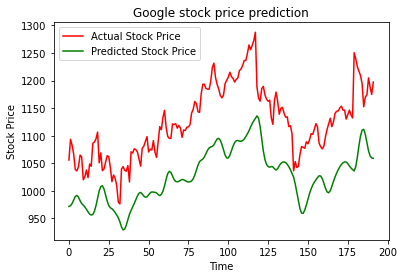

In [22]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()